<hr/>

# Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 15** - Oct 26, 2016

- Classification summary
- Logistic regression, SVM
- Intro to kernel methods
<hr/>


### Classification

Some ideas with names:

- Naive Bayes
- Quadratic Discriminant Analysis
- Linear Discriminant Analysis
- $k$ Nearest Neighbor
- Decision trees
- Random forests
- Logistic regression
- Support Vector Machines




### Logistic Regression

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/600px-Logistic-curve.svg.png" width=300 align=right \>

- Classsifying into 2 classes: fit the probability

> Sigmoid function

>$\displaystyle \sigma(t) = \frac{1}{1+e^{-t}}$

> Cf. Posterior as fn of the log Bayes factor







0. Plug in say a linear model $t=\beta^T \phi(x)$, as we did for linear regression
0. Fit the transformed probability

>$\displaystyle \log \frac{p(x)}{1-p(x)} = \beta_0 + \beta_1 x$

>$\displaystyle p(x) = \frac{1}{1+e^{-(\beta_0+\beta_1 x)}}$



In [1]:
%pylab inline
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2] # only first 2 features
c = iris.target
subset = c<2 # classes 0 and 1
X,c = X[subset,:], c[subset]

print 'New classes:', np.unique(c)
print 'New data:', X.shape

Populating the interactive namespace from numpy and matplotlib
New classes: [0 1]
New data: (100L, 2L)


In [2]:
# grid for plotting
h = 0.01
x,y = meshgrid(arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
               arange(X[:,1].min()-.5, X[:,1].max()+.5, h))


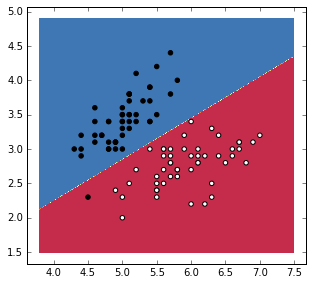

In [3]:
# 2D model with x and y coordinates
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,c)
z = clf.predict(c_[x.ravel(),y.ravel()]).reshape(x.shape)
figure(figsize=(5,5)); subplot(111,aspect='equal')
contourf(x,y,z, cmap=cm.Spectral_r)
scatter(X[:,0],X[:,1], c=c, cmap=cm.gray);

### Support Vector Machines


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/512px-Svm_separating_hyperplanes_%28SVG%29.svg.png" align=right width=300 \>


- Pick the best hyperplane to separate classes, cf. LDA
- Generalization to sets of hyperplanes
- Also kernel variants - more on this later





<img src="https://upload.wikimedia.org/wikipedia/commons/2/2a/Svm_max_sep_hyperplane_with_margin.png" align=right width=300 \>

- Maximize distance to either classes





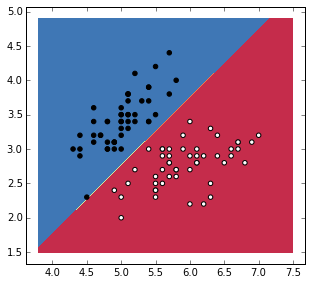

In [4]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X,c)
z = clf.predict(c_[x.ravel(),y.ravel()]).reshape(x.shape)
figure(figsize=(5,5)); subplot(111,aspect='equal')
contourf(x,y,z, cmap=cm.Spectral_r)
scatter(X[:,0],X[:,1], c=c, cmap=cm.gray);

### Kernel methods

 - Data transformation $x$ to $\phi(x)$ 
 - Use the same methods as before on transformed data

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b1/Svm_8_polinomial.JPG" align=left width=400 \>

### Kernel trick

- Similarity of $x$ and $x'$ in general

- Inner product

>$ \displaystyle k(x,x') = \phi(x) \cdot \phi(x')$



### Kernel functions

- We don't even need to think about $\phi(\cdot)$

- Different kernel functions, e.g.,

> Polynomial

>$\ \ \ \ \ \ \displaystyle k(x,y) = ( x^T y + c)^d$


> RBF (radial basis function)

>$\ \ \ \ \ \ \displaystyle k(x,y) = \exp\left\{-\frac{(x-y)^2}{2\sigma^2}\right\}$



### Kernel everything

- Kernel regression
- Kernel PCA
- Kernel SVM
- Kernel whatever-makes-sense

### Comparison of Classifiers

 - Check out the 
<a href="http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">demo script</a> running a bunch of classifiers in sklearn 


- **Exercise!** Run the script for the classifiers we discussed to compare the results